# ParT+auxのエポックを選択する際の性能指標を変化させたときの性能変化を調べる（$\mathrm{lr} = 10^{-4}$）

In [1]:
import os
from typing import Tuple, Dict, List, Union, Any, Optional, Literal, MutableSequence
import argparse
import random
import warnings

import h5py
import yaml
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import atlasify
from dotenv import load_dotenv
from tqdm import tqdm

from modules.compare import Comparator, ComparatorPlotter, RocAnalyzer

2024-01-22 17:07:52.648882: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
base_dir = "./comparisons/part-aux-lr04-metrics/"
with open(os.path.join(base_dir, "config.yaml"), "r") as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [3]:
comparator_ttbar = Comparator(config, sample="ttbar")
comparator_plotter_ttbar = ComparatorPlotter(comparator_ttbar, save_dir=os.path.join(base_dir, "ttbar", "comparisons"))

ref. model:	GN2
meta model:	ParT+aux_loss(89)
Before cut nan:  4042856
After cut nan:  4038771
No cut by condition
Before cut nan:  4042856
After cut nan:  4038771
No cut by condition


In [4]:
btag_plot_roc = comparator_plotter_ttbar.plot_btag_rejection_comparison(lim_eff=(0.6, 1.0))
ctag_plot_roc = comparator_plotter_ttbar.plot_ctag_rejection_comparison(lim_eff=(0.2, 1.0))

Saved ./comparisons/part-aux-lr04-metrics/ttbar/comparisons/btag_rejection_comparison.pdf
Saved ./comparisons/part-aux-lr04-metrics/ttbar/comparisons/ctag_rejection_comparison.pdf


In [5]:
model_names = [model["name"] for model in config["models"]]
btag_roc_values = RocAnalyzer(model_names, btag_plot_roc).get_rejection_vlues_at_wp(wp=0.7)
ctag_roc_values = RocAnalyzer(model_names, ctag_plot_roc).get_rejection_vlues_at_wp(wp=0.3)

In [6]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="b",
    background_flavor="l",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 3500),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [7]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="b",
    background_flavor="c",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 150),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [8]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="c",
    background_flavor="l",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 600),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.3,
    logy=False,
)

In [9]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="c",
    background_flavor="b",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 50),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.3,
    logy=False,
)

In [10]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="b",
    background_flavor="l",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 6000),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [11]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="b",
    background_flavor="c",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 100),
    working_point=0.7,
    logy=False,
)

In [12]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="c",
    background_flavor="l",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 1000),
    working_point=0.3,
    logy=False,
)

In [13]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="c",
    background_flavor="b",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 80),
    working_point=0.3,
    logy=False,
)

In [14]:
# comparator_plotter_ttbar.plot_btag_iso_efficiency(
#     fc_values=np.linspace(0., 1.0, 101),
#     fc_target_value=0.018, wp=0.7, use_log=True,
#     # xlim=(1e-2, 1e0),
#     ylim=(1e-4, 2e-2),
# )

In [15]:
# comparator_plotter_ttbar.plot_ctag_iso_efficiency(
#     fb_values=np.linspace(0., 1.0, 101),
#     fb_target_value=0.20, wp=0.3, use_log=True,
#     # xlim=(1e-2, 1e0), ylim=(1e-4, 1e-2),
# )

In [16]:
comparator_zprime = Comparator(config, sample="zprime")
comparator_plotter_zprime = ComparatorPlotter(comparator_zprime, save_dir=os.path.join(base_dir, "zprime", "comparisons"))

ref. model:	GN2
meta model:	ParT+aux_loss(89)
Before cut nan:  4016172
After cut nan:  3997931
No cut by condition
Before cut nan:  4016172
After cut nan:  3997931
No cut by condition


In [17]:
comparator_plotter_zprime.plot_btag_rejection_comparison(lim_eff=(0.6, 1.0))
comparator_plotter_zprime.plot_ctag_rejection_comparison(lim_eff=(0.2, 1.0))

Saved ./comparisons/part-aux-lr04-metrics/zprime/comparisons/btag_rejection_comparison.pdf
Saved ./comparisons/part-aux-lr04-metrics/zprime/comparisons/ctag_rejection_comparison.pdf


RocPlot(title='', draw_errors=True, xmin=0.2, xmax=1.0, ymin=None, ymax=None, ymin_ratio_1=None, ymax_ratio_1=None, ymin_ratio_2=None, ymax_ratio_2=None, y_scale=5.9913450628232905, logx=False, logy=True, xlabel='$c$-jet efficiency', ylabel='Background rejection', ylabel_ratio_1='Light-jets ratio', ylabel_ratio_2='b-jets ratio', label_fontsize=12, fontsize=10, n_ratio_panels=2, vertical_split=False, figsize=(6, 6), dpi=400, transparent=False, grid=True, leg_fontsize=10, leg_loc='upper right', leg_linestyle_loc='upper center', leg_ncol=1, apply_atlas_style=True, use_atlas_tag=True, atlas_first_tag='Simulation Work in Progress', atlas_second_tag="$\\sqrt{s}=13$ TeV, PFlow-jets \n$Z'$, $f_{b}=$0.200", atlas_fontsize=10, atlas_vertical_offset=7, atlas_horizontal_offset=8, atlas_brand='ATLAS', atlas_tag_outside=False, atlas_second_tag_distance=0, plotting_done=True)

In [18]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="b",
    background_flavor="l",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 150),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [19]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="b",
    background_flavor="c",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 10),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [20]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="c",
    background_flavor="l",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 50),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.3,
    logy=False,
)

In [21]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="c",
    background_flavor="b",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 15),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.3,
    logy=False,
)

In [22]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="b",
    background_flavor="l",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 120),
    working_point=0.7,
    logy=False,
)

In [23]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="b",
    background_flavor="c",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 10),
    working_point=0.7,
    logy=False,
)

In [24]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="c",
    background_flavor="l",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 60),
    working_point=0.3,
    logy=False,
)

In [25]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="c",
    background_flavor="b",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 20),
    working_point=0.3,
    logy=False,
)

In [26]:
# comparator_plotter_zprime.plot_btag_iso_efficiency(
#     fc_values=np.linspace(0., 1.0, 101),
#     fc_target_value=0.018, wp=0.7, use_log=True,
#     xlim = (1e-1, 1e-0),
#     # ylim=(0.025, 0.10),
# )

In [27]:
# comparator_plotter_zprime.plot_ctag_iso_efficiency(
#     fb_values=np.linspace(0., 1.0, 101),
#     fb_target_value=0.20, wp=0.3,
#     use_log=True,
#     # xlim = (0.19, 0.45),
#     # ylim=(0.025, 0.10),
# )

In [3]:
history = pd.read_csv("/home/suzukiy/ftag/particlenet-ftag/models/parT/GN1-MT-lr_1e-04_fix/history.csv")
if not "epoch" in history.columns:
    history["epoch"] = history.index
history

# remove train_btag_* and train_ctag_* columns
history = history.loc[:, ~history.columns.str.startswith("train_btag_")]
history = history.loc[:, ~history.columns.str.startswith("train_ctag_")]
# remove val_btag_* and val_ctag_* columns
history = history.loc[:, ~history.columns.str.startswith("val_btag_")]
history = history.loc[:, ~history.columns.str.startswith("val_ctag_")]

# change column names training_* -> train_* and validation_* -> val_*
history.columns = [c.replace("training_", "train_") for c in history.columns]
history.columns = [c.replace("validation_", "val_") for c in history.columns]
history

train_loss_jet_classification  train_loss_track_origin  \
0                        0.740768                 0.503560   
1                        0.698631                 0.448790   
2                        0.684047                 0.433461   
3                        0.675014                 0.423743   
4                        0.668851                 0.416862   
..                            ...                      ...   
95                       0.622599                 0.370512   
96                       0.622494                 0.370445   
97                       0.622345                 0.370350   
98                       0.622205                 0.370291   
99                       0.622076                 0.370226   

    train_loss_vertexing  train_loss  train_acc  val_loss_jet_classification  \
0               0.494111    1.738438   0.645094                     0.715082   
1               0.450415    1.597836   0.669773                     0.696322   
2               0.438473    1.555981   0.678162                     0.683816   
3               0.430806    1.529564   0.683351                     0.677981   
4               0.425128    1.510841   0.686914                     0.673039   
..                   ...         ...        ...                          ...   
95              0.381046    1.374157   0.713050                     0.650074   
96              0.380993    1.373933   0.713062                     0.649683   
97              0.380904    1.373599   0.713128                     0.649535   
98              0.380857    1.373353   0.713246                     0.649610   
99              0.380798    1.373099   0.713317                     0.649995   

    val_loss_track_origin  val_loss_vertexing  val_loss   val_acc  ...  \
0                0.448246            0.452403  1.615731  0.659232  ...   
1                0.428515            0.436648  1.561485  0.671084  ...   
2                0.416432            0.426848  1.527095  0.678795  ...   
3                0.409370            0.420558  1.507909  0.681852  ...   
4                0.404031            0.415622  1.492692  0.685068  ...   
..                    ...                 ...       ...       ...  ...   
95               0.370164            0.379889  1.400126  0.698622  ...   
96               0.370113            0.379710  1.399506  0.699232  ...   
97               0.369845            0.379373  1.398753  0.699002  ...   
98               0.369883            0.379416  1.398909  0.698998  ...   
99               0.370015            0.379349  1.399360  0.698994  ...   

    train_btag_rej_l  train_ctag_rej_b  train_ctag_rej_l  val_btag_rej_c  \
0          41.734443          6.527443         27.792005        4.258682   
1          74.312091          8.379451         40.717210        4.532194   
2          90.834703          9.463452         49.188115        4.695592   
3         105.547412         10.103506         54.339093        5.019639   
4         115.710161         10.685681         59.517843        5.093620   
..               ...               ...               ...             ...   
95        248.735751         15.424748        101.568968        6.524588   
96        244.939657         15.391239        101.477427        6.655905   
97        246.764853         15.506015        102.765558        6.593760   
98        245.309110         15.544831        102.927430        6.618150   
99        248.381198         15.479430        102.230119        6.584911   

    val_btag_rej_l  val_ctag_rej_b  val_ctag_rej_l  btag_wp  ctag_wp  epoch  
0        58.238583        7.600474       36.553017      0.7      0.3      0  
1        74.334673        8.375257       48.285725      0.7      0.3      1  
2        88.016263        9.684507       52.990527      0.7      0.3      2  
3        96.937090       10.028900       57.658467      0.7      0.3      3  
4       103.621887       10.449357       62.345884      0.7      0.3      4  
..             ...          

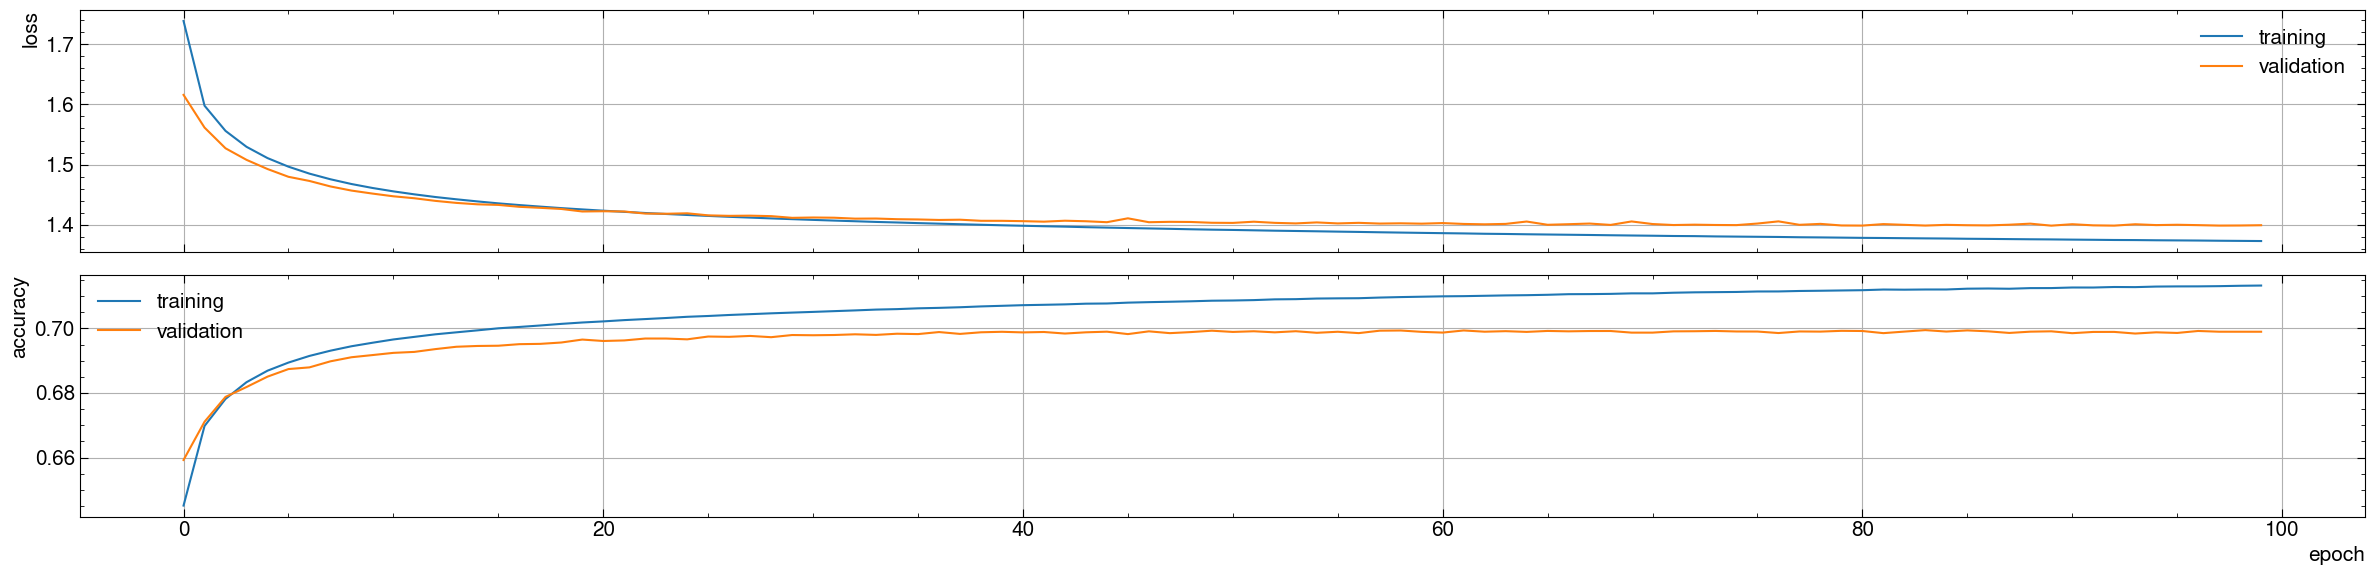

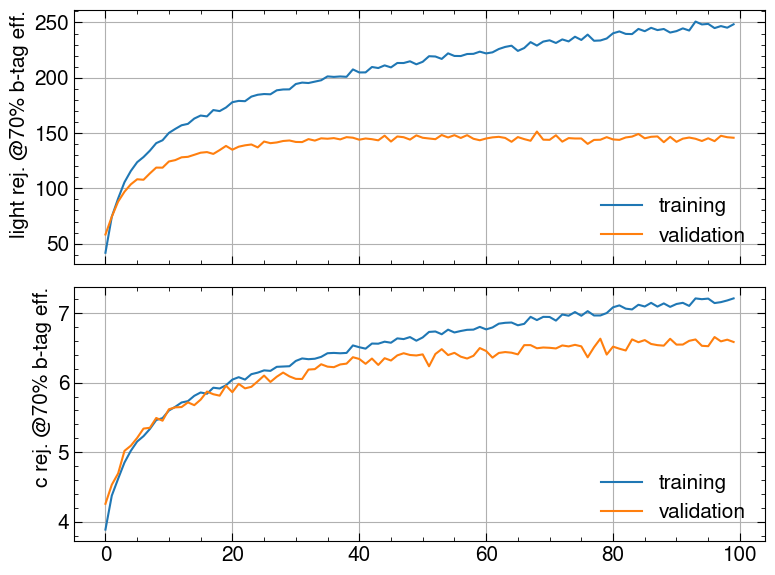

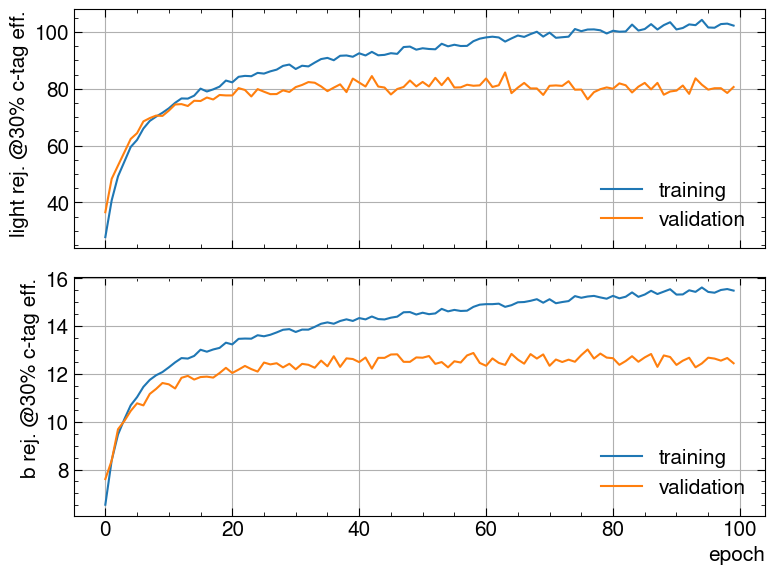

In [7]:
%matplotlib inline
import atlasify
# fontsize = 15
plt.rcParams["font.size"] = 15
plt.rcParams["font.family"] = "sans-serif"

fig, ax = plt.subplots(2, 1, figsize=(4*6, 6), sharex=True)
ax[0].plot(history["train_loss"], label="training")
ax[0].plot(history["val_loss"], label="validation")
ax[0].set_ylabel("loss", loc="top")
ax[0].legend()
ax[0].grid()
ax[1].plot(history["train_acc"], label="training")
ax[1].plot(history["val_acc"], label="validation")
ax[1].set_ylabel("accuracy", loc="top")
ax[1].set_xlabel("epoch", loc="right")
ax[1].legend()
ax[1].grid()

for a in ax:
    atlasify.atlasify(atlas=None, axes=a, enlarge=1.0)

fig.tight_layout()
fig.savefig(os.path.join(base_dir, "history_plot_loss_acc.pdf"))
plt.show()

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
ax[0].plot(history["train_btag_rej_l"], label="training")
ax[0].plot(history["val_btag_rej_l"], label="validation")
ax[0].set_ylabel("light rej. @70% b-tag eff.", loc="top")
ax[0].legend(loc="lower right")
ax[0].grid()
ax[1].plot(history["train_btag_rej_c"], label="training")
ax[1].plot(history["val_btag_rej_c"], label="validation")
ax[1].set_ylabel("c rej. @70% b-tag eff.", loc="top")
ax[1].legend(loc="lower right")
ax[1].grid()

for a in ax:
    atlasify.atlasify(atlas=None, axes=a, enlarge=1.0)

fig.tight_layout()
fig.savefig(os.path.join(base_dir, "history_plot_btag.pdf"))
plt.show()

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
ax[0].plot(history["train_ctag_rej_l"], label="training")
ax[0].plot(history["val_ctag_rej_l"], label="validation")
ax[0].set_ylabel("light rej. @30% c-tag eff.", loc="top")
ax[0].legend(loc="lower right")
ax[0].grid()
ax[1].plot(history["train_ctag_rej_b"], label="training")
ax[1].plot(history["val_ctag_rej_b"], label="validation")
ax[1].set_ylabel("b rej. @30% c-tag eff.", loc="top")
ax[1].set_xlabel("epoch" , loc="right")
ax[1].legend(loc="lower right")
ax[1].grid()

for a in ax:
    atlasify.atlasify(atlas=None, axes=a, enlarge=1.0)

fig.tight_layout()
fig.savefig(os.path.join(base_dir, "history_plot_ctag.pdf"))
plt.show()

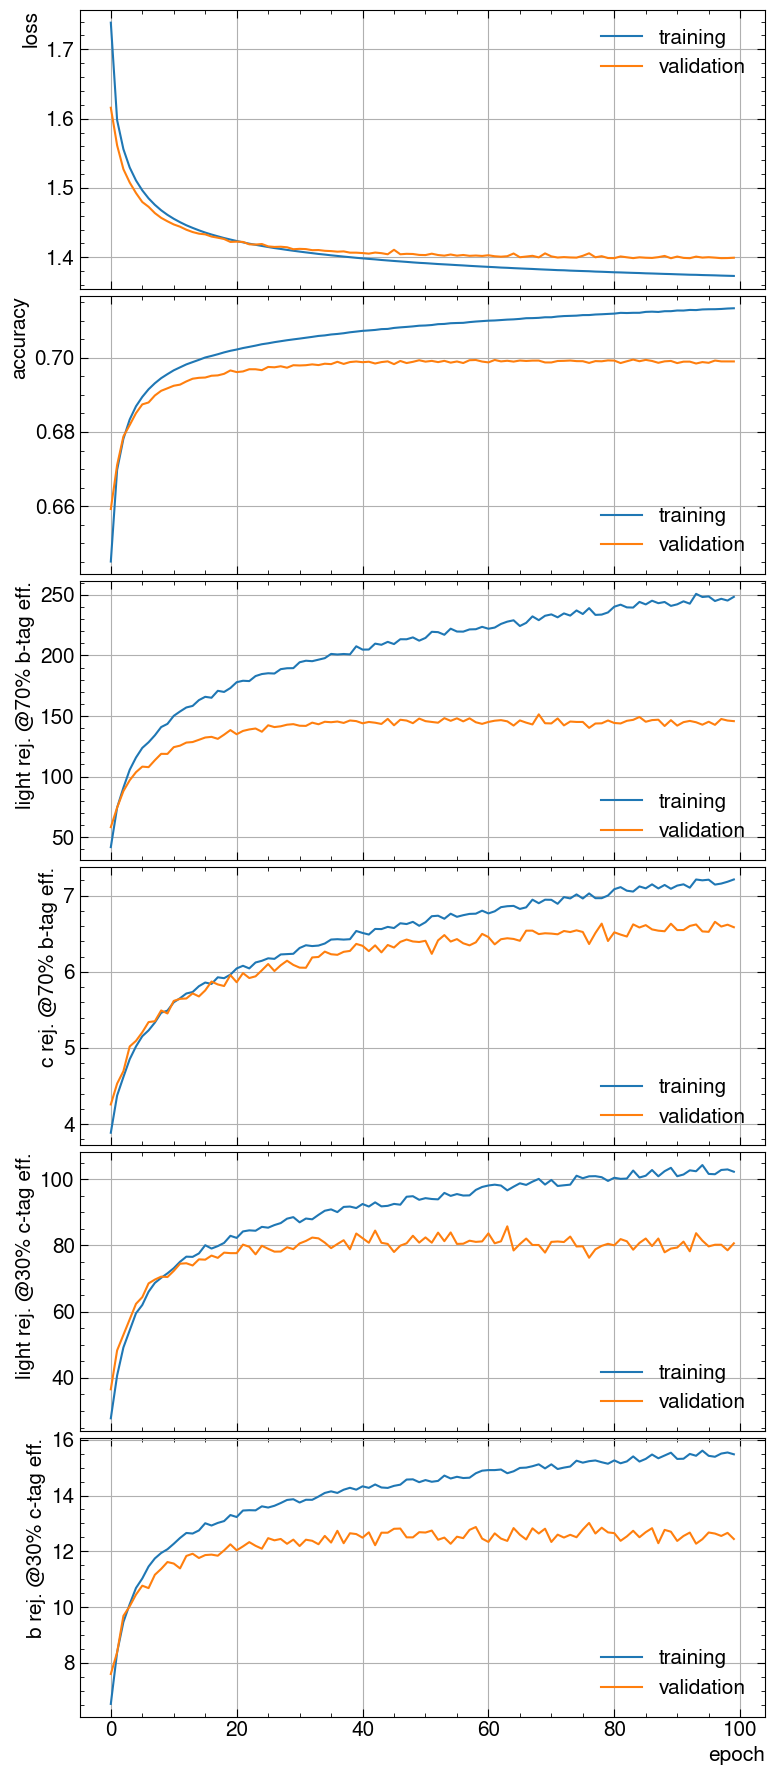

In [50]:
%matplotlib inline
import atlasify
# fontsize = 15
plt.rcParams["font.size"] = 15
plt.rcParams["font.family"] = "sans-serif"

fig, ax = plt.subplots(6, 1, figsize=(8, 3*6), sharex=True)
ax[0].plot(history["train_loss"], label="training")
ax[0].plot(history["val_loss"], label="validation")
ax[0].set_ylabel("loss", loc="top")
ax[0].legend()
ax[0].grid()

ax[1].plot(history["train_acc"], label="training")
ax[1].plot(history["val_acc"], label="validation")
ax[1].set_ylabel("accuracy", loc="top")
ax[1].legend()
ax[1].grid()

ax[2].plot(history["train_btag_rej_l"], label="training")
ax[2].plot(history["val_btag_rej_l"], label="validation")
ax[2].set_ylabel("light rej. @70% b-tag eff.", loc="top")
ax[2].legend(loc="lower right")
ax[2].grid()

ax[3].plot(history["train_btag_rej_c"], label="training")
ax[3].plot(history["val_btag_rej_c"], label="validation")
ax[3].set_ylabel("c rej. @70% b-tag eff.", loc="top")
ax[3].legend(loc="lower right")
ax[3].grid()

ax[4].plot(history["train_ctag_rej_l"], label="training")
ax[4].plot(history["val_ctag_rej_l"], label="validation")
ax[4].set_ylabel("light rej. @30% c-tag eff.", loc="top")
ax[4].legend(loc="lower right")
ax[4].grid()

ax[5].plot(history["train_ctag_rej_b"], label="training")
ax[5].plot(history["val_ctag_rej_b"], label="validation")
ax[5].set_ylabel("b rej. @30% c-tag eff.", loc="top")
ax[5].set_xlabel("epoch" , loc="right")
ax[5].legend(loc="lower right")
ax[5].grid()

for a in ax:
    atlasify.atlasify(atlas=None, axes=a, enlarge=1.0)

fig.tight_layout(h_pad=-0.1)
fig.savefig(os.path.join(base_dir, "history_plot.pdf"))
plt.show()

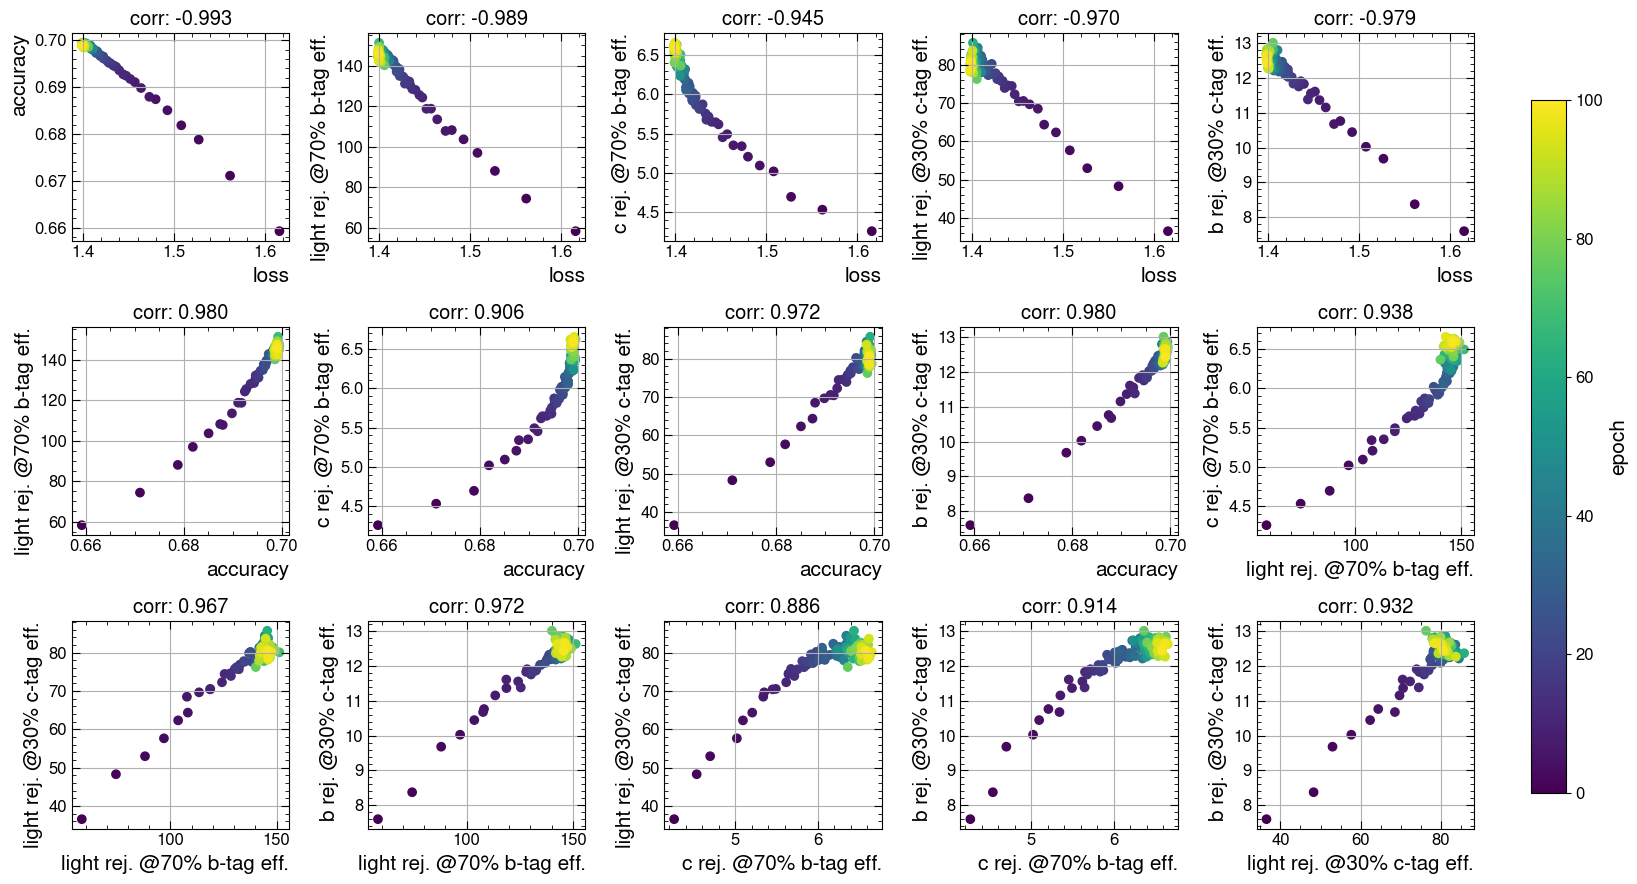

In [8]:
# 各性能指標の全通りの組み合わせをプロットする(validationのみ)
%matplotlib inline
from itertools import combinations

plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "sans-serif"

metrics_name = ["loss", "acc", "btag_rej_l", "btag_rej_c", "ctag_rej_l", "ctag_rej_b"]
dict_metrics_name = {
    "loss": "loss",
    "acc": "accuracy",
    "btag_rej_l": "light rej. @70% b-tag eff.",
    "btag_rej_c": "c rej. @70% b-tag eff.",
    "ctag_rej_l": "light rej. @30% c-tag eff.",
    "ctag_rej_b": "b rej. @30% c-tag eff.",
}

corr = history[[f"val_{m}" for m in metrics_name]].corr()

# 一枚にまとめたプロットも作る
fig, ax = plt.subplots(3, 5, figsize=(5*3, 3*3))
for i, (metric1, metric2) in enumerate(combinations(metrics_name, 2)):
    ax[i//5, i%5].scatter(history[f"val_{metric1}"], history[f"val_{metric2}"], c=history["epoch"], vmin=0, vmax=100)
    ax[i//5, i%5].set_title(f"corr: {corr.loc[f'val_{metric1}', f'val_{metric2}']:.3f}")
    ax[i//5, i%5].set_xlabel(dict_metrics_name[metric1], loc="right", fontsize=15)
    ax[i//5, i%5].set_ylabel(dict_metrics_name[metric2], loc="top", fontsize=15)
    ax[i//5, i%5].grid()
    atlasify.atlasify(atlas=None, axes=ax[i//5, i%5], enlarge=1.0)
# 右端にカラーバーを追加
# 右端に余白を作る
fig.subplots_adjust(right=1.05)
cbar = fig.colorbar(ax[0,0].collections[0], ax=ax[:, -1])
cbar.set_label("epoch", fontsize=15)


fig.tight_layout()
fig.savefig(os.path.join(base_dir, "history_all.pdf"), bbox_inches="tight")
plt.show()

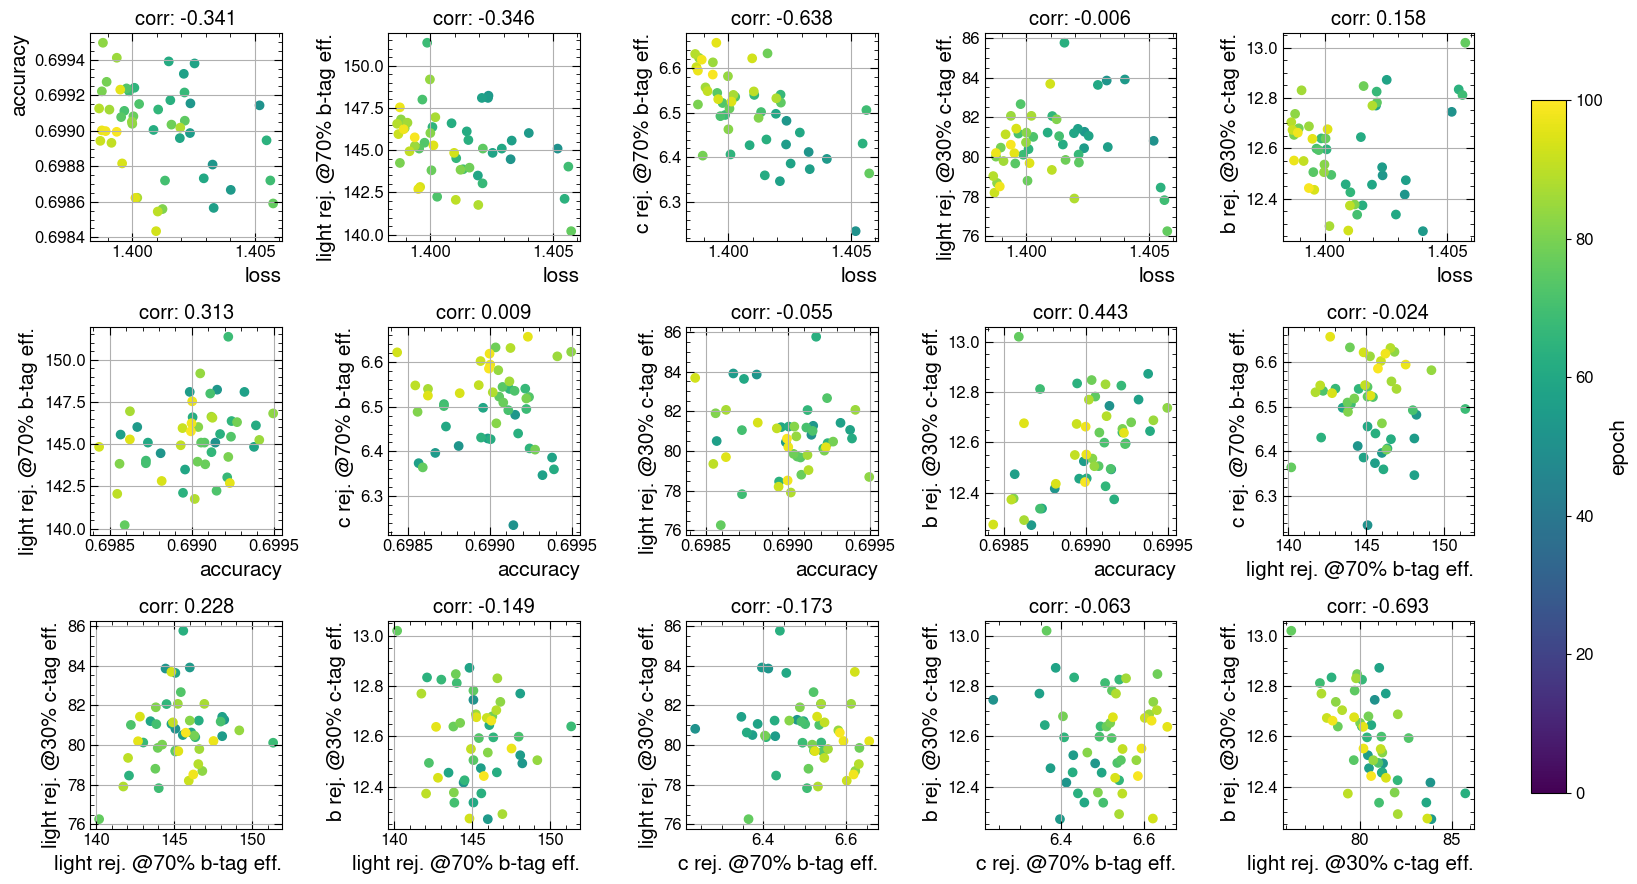

In [31]:
# 各性能指標の全通りの組み合わせをプロットする(validationのみ)
%matplotlib inline
from itertools import combinations


history = history[history["epoch"] > 50]
metrics_name = ["loss", "acc", "btag_rej_l", "btag_rej_c", "ctag_rej_l", "ctag_rej_b"]


corr = history[[f"val_{m}" for m in metrics_name]].corr()

# 一枚にまとめたプロットも作る
fig, ax = plt.subplots(3, 5, figsize=(5*3, 3*3))
for i, (metric1, metric2) in enumerate(combinations(metrics_name, 2)):
    ax[i//5, i%5].scatter(history[f"val_{metric1}"], history[f"val_{metric2}"], c=history["epoch"], vmin=0, vmax=100)
    ax[i//5, i%5].set_title(f"corr: {corr.loc[f'val_{metric1}', f'val_{metric2}']:.3f}")
    ax[i//5, i%5].set_xlabel(dict_metrics_name[metric1], loc="right", fontsize=15)
    ax[i//5, i%5].set_ylabel(dict_metrics_name[metric2], loc="top", fontsize=15)
    # if i in [5, 6, 7, 8]:
    #     pass
    #     # ticksの数値が被っているので調整
    #     ax[i//5, i%5].set_xticks([0.6985, 0.6990, 0.6995, 0.7])
    ax[i//5, i%5].grid()
    atlasify.atlasify(atlas=None, axes=ax[i//5, i%5], enlarge=1.0)
# 右端にカラーバーを追加
# 右端に余白を作る
fig.subplots_adjust(right=1.05)
cbar = fig.colorbar(ax[0,0].collections[0], ax=ax[:, -1])
cbar.set_label("epoch", fontsize=15)


fig.tight_layout()
fig.savefig(os.path.join(base_dir, "history_all_after_50.pdf"), bbox_inches="tight")
plt.show()

In [32]:
# 各性能指標の全通りの組み合わせをプロットする(validationのみ)
%matplotlib inline
from itertools import combinations

plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "sans-serif"

metrics_name = ["loss", "acc", "btag_rej_l", "btag_rej_c", "ctag_rej_l", "ctag_rej_b"]
dict_metrics_name = {
    "loss": "loss",
    "acc": "accuracy",
    "btag_rej_l": "light rej. @70% b-tag eff.",
    "btag_rej_c": "c rej. @70% b-tag eff.",
    "ctag_rej_l": "light rej. @30% c-tag eff.",
    "ctag_rej_b": "b rej. @30% c-tag eff.",
}

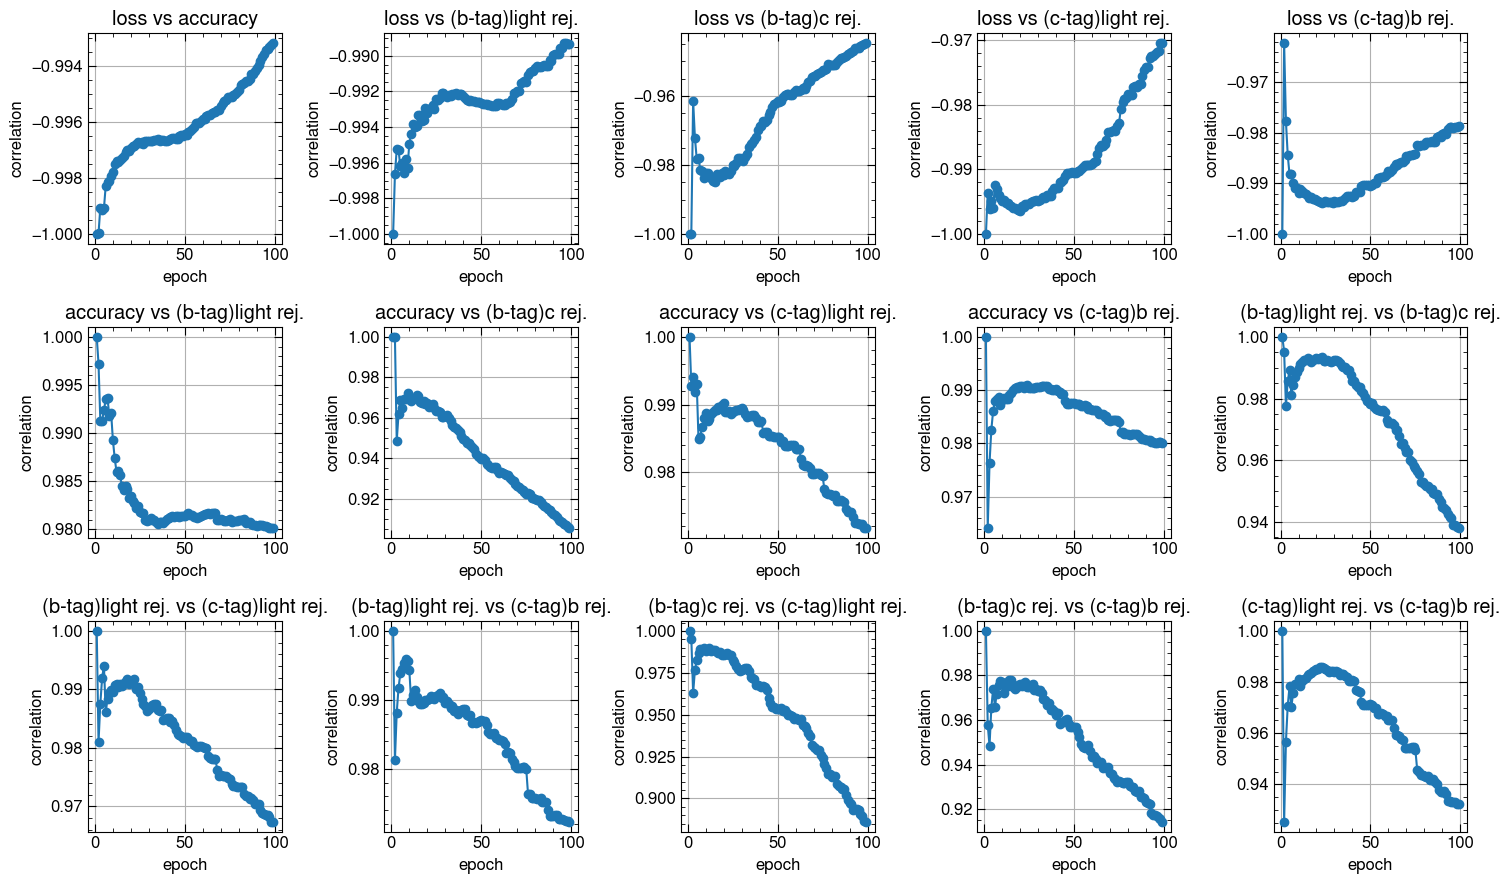

In [15]:
from itertools import combinations
dict_metrics_name = {
    "loss": "loss",
    "acc": "accuracy",
    "btag_rej_l": "(b-tag)light rej.",
    "btag_rej_c": "(b-tag)c rej.",
    "ctag_rej_l": "(c-tag)light rej.",
    "ctag_rej_b": "(c-tag)b rej.",
}
# 一枚にまとめたプロットも作る
plt.rcParams["font.size"] = 12
fig, ax = plt.subplots(3, 5, figsize=(5*3, 3*3))
for i, (metric1, metric2) in enumerate(combinations(metrics_name, 2)):
    ax[i//5, i%5].plot(history["epoch"], [
        np.corrcoef(history[history["epoch"] <= t][[f"val_{metric1}", f"val_{metric2}"]].values.T)[0, 1]
        for t in range(100)
    ], marker="o")
    ax[i//5, i%5].set_xlabel("epoch")
    ax[i//5, i%5].set_ylabel("correlation")
    ax[i//5, i%5].set_title(f"{dict_metrics_name[metric1]} vs {dict_metrics_name[metric2]}")
    ax[i//5, i%5].grid()
    atlasify.atlasify(atlas=None, axes=ax[i//5, i%5], enlarge=1.0)

fig.tight_layout()
fig.savefig(os.path.join(base_dir, "history_corr.pdf"), bbox_inches="tight")
plt.show()

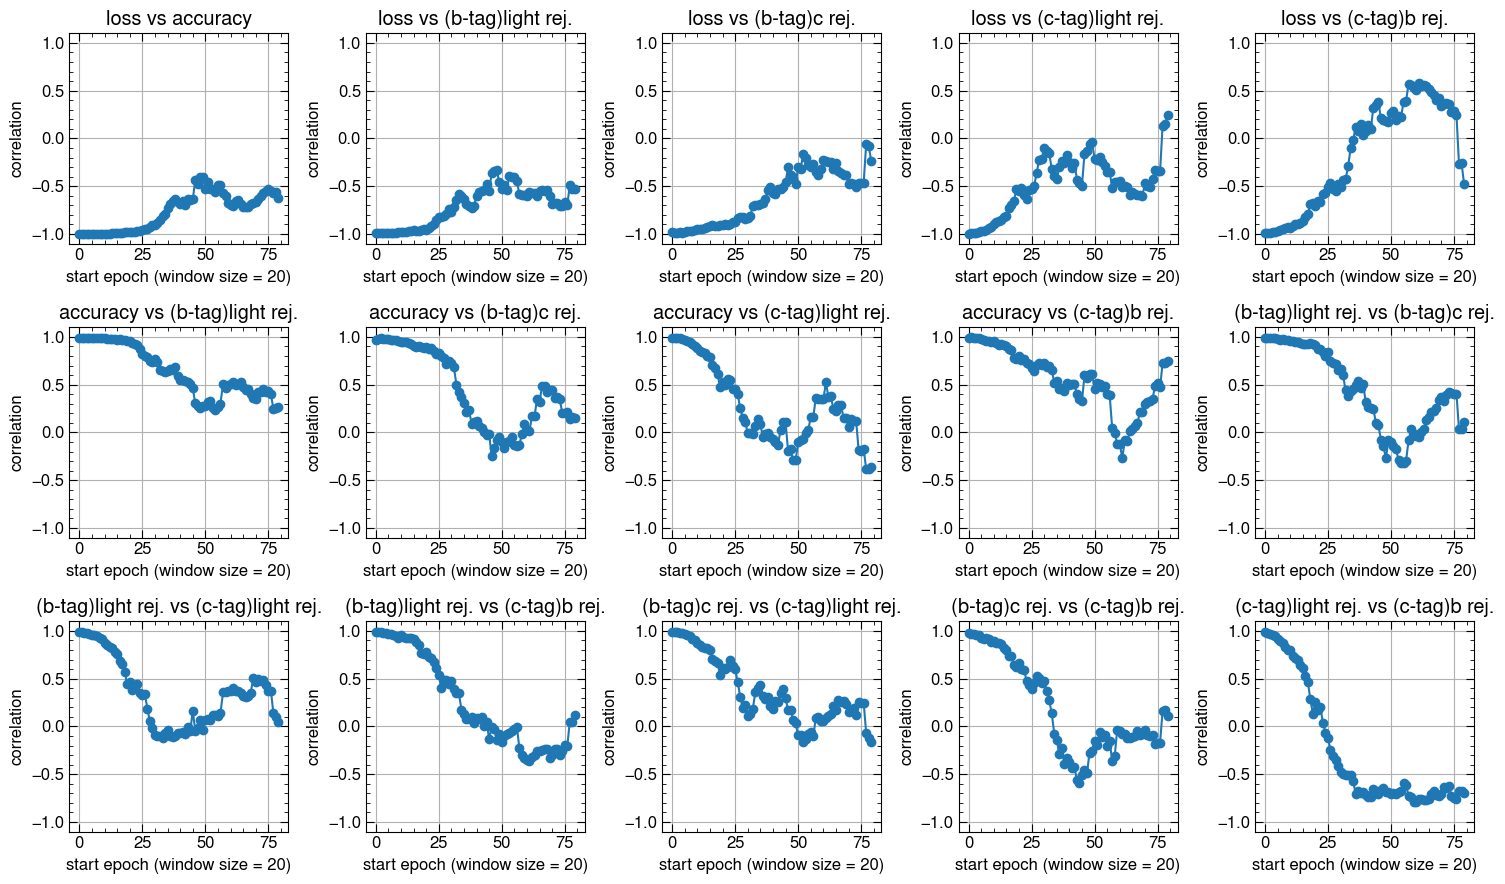

In [17]:
from itertools import combinations
dict_metrics_name = {
    "loss": "loss",
    "acc": "accuracy",
    "btag_rej_l": "(b-tag)light rej.",
    "btag_rej_c": "(b-tag)c rej.",
    "ctag_rej_l": "(c-tag)light rej.",
    "ctag_rej_b": "(c-tag)b rej.",
}
# 一枚にまとめたプロットも作る
plt.rcParams["font.size"] = 12
fig, ax = plt.subplots(3, 5, figsize=(5*3, 3*3))
for i, (metric1, metric2) in enumerate(combinations(metrics_name, 2)):
    ax[i//5, i%5].plot(np.arange(80), [
        np.corrcoef(history[(history["epoch"] < t+20)&(history["epoch"] >= t)][[f"val_{metric1}", f"val_{metric2}"]].values.T)[0, 1]
        for t in range(80)
    ], marker="o")
    ax[i//5, i%5].set_ylim(-1.1, 1.1)
    ax[i//5, i%5].set_xlabel("start epoch (window size = 20)")
    ax[i//5, i%5].set_ylabel("correlation")
    ax[i//5, i%5].set_title(f"{dict_metrics_name[metric1]} vs {dict_metrics_name[metric2]}")
    ax[i//5, i%5].grid()
    atlasify.atlasify(atlas=None, axes=ax[i//5, i%5], enlarge=1.0)

fig.tight_layout()
fig.savefig(os.path.join(base_dir, "history_corr_window.pdf"), bbox_inches="tight")
plt.show()